In [6]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [38]:
df = pd.read_csv('C:/Users/admin/OneDrive/Desktop/my folder/college work/driving_behavior_large_dataset.csv', sep=',')
df.head(100)

,Timestamp,Speed (km/h),Acceleration (m/s²),Brake Pressure (%),Throttle Position (%),Gear Position,RPM,Clutch Engagement (%),Steering Angle (°),Lateral Acceleration (m/s²),Yaw Rate (°/s),Event Label
0,2025-03-06 00:00:00,44.944814,4.265383,38.178485,77.322182,5,5459.964683,25.303037,-12.877242,2.044749,-2.036067,Normal
1,2025-03-06 00:00:01,114.085717,-1.175388,88.427978,2.286953,1,2050.427320,39.662191,21.954617,-0.177723,-2.036703,Normal
2,2025-03-06 00:00:02,87.839273,3.714694,45.058013,13.525589,5,5181.824548,96.112586,-24.358434,-2.397238,4.675761,Half Clutch
3,2025-03-06 00:00:03,71.839018,2.614714,88.920300,54.715272,1,1736.037804,52.720320,2.223839,-0.990769,2.464716,Normal
4,2025-03-06 00:00:04,18.722237,-1.711745,40.017790,11.273360,5,3879.617242,3.721396,-24.640179,0.957197,4.986777,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-03-06 00:01:35,59.255472,3.011807,29.157029,16.136443,2,6657.505196,30.004583,-6.934605,0.564201,3.733775,Normal
96,2025-03-06 00:01:36,62.727940,-0.331755,60.453236,79.244350,5,6853.255164,79.229296,14.422581,-1.572659,1.002791,Half Clutch
97,2025-03-06 00:01:37,51.304922,-4.940879,51.034389,78.951395,2,5796.752245,40.889013,18.415271,-1.077273,1.267805,Normal
98,2025-03-06 00:01:38,3.050295,2.051103,17.846184,52.244291,2,2908.551802,19.579842,-5.647576,-2.488202,-3.268334,Normal


In [39]:
df.info

<bound method DataFrame.info of                    Timestamp  Speed (km/h)  Acceleration (m/s²)  \
0        2025-03-06 00:00:00     44.944814             4.265383   
1        2025-03-06 00:00:01    114.085717            -1.175388   
2        2025-03-06 00:00:02     87.839273             3.714694   
3        2025-03-06 00:00:03     71.839018             2.614714   
4        2025-03-06 00:00:04     18.722237            -1.711745   
...                      ...           ...                  ...   
9999995  2025-06-29 17:46:35     29.396475             0.363082   
9999996  2025-06-29 17:46:36      7.396443             1.561997   
9999997  2025-06-29 17:46:37    111.995357            -4.588188   
9999998  2025-06-29 17:46:38     29.417861            -1.600837   
9999999  2025-06-29 17:46:39     46.666808             1.469075   

         Brake Pressure (%)  Throttle Position (%)  Gear Position  \
0                 38.178485              77.322182              5   
1                 88.4279

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:
             Timestamp  Speed (km/h)  Acceleration (m/s²)  Brake Pressure (%)  \
0  2025-03-06 00:00:00     44.944814             4.265383           38.178485   
1  2025-03-06 00:00:01    114.085717            -1.175388           88.427978   
2  2025-03-06 00:00:02     87.839273             3.714694           45.058013   
3  2025-03-06 00:00:03     71.839018             2.614714           88.920300   
4  2025-03-06 00:00:04     18.722237            -1.711745           40.017790   

   Throttle Position (%)  Gear Position          RPM  Clutch Engagement (%)  \
0              77.322182              5  5459.964683              25.303037   
1               2.286953              1  2050.427320              39.662191   
2              13.525589              5  5181.824548              96.112586   
3              54.715272              1  1736.037804              52.720320   
4              11.273360              5  3879.617242               3.721396   

   Steering Angle (°

In [41]:
if "Event Label" in df.columns:
    label_encoder = LabelEncoder()
    df["Event Label"] = label_encoder.fit_transform(df["Event Label"])

In [42]:
X = df.drop(columns=["Event Label", "Timestamp"], errors="ignore")  
y = df["Event Label"]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    576343
           1       1.00      1.00      1.00     40042
           2       1.00      1.00      1.00   1279723
           3       1.00      1.00      1.00     39978
           4       1.00      1.00      1.00     63914

    accuracy                           1.00   2000000
   macro avg       1.00      1.00      1.00   2000000
weighted avg       1.00      1.00      1.00   2000000



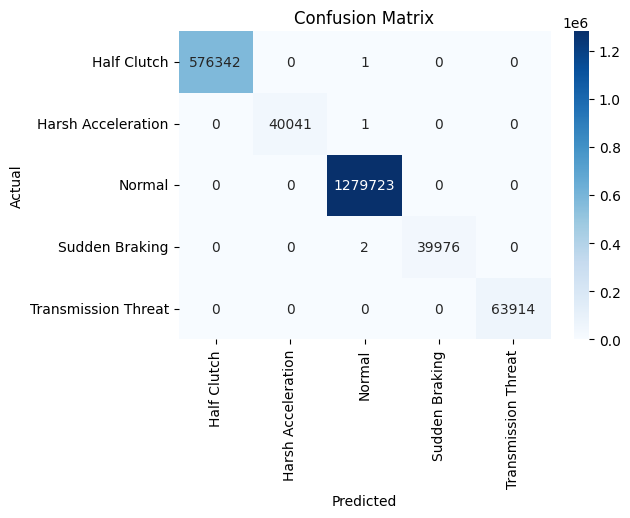

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()